# RoadMap 4 - DataLoader base codes

    1. Data for Image Classification
    
    2. Preset Data Loaders

In [1]:
import torch
import numpy as np
from torchvision import transforms, datasets
from PIL import Image
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

## 1. Data for Image Classification

    1.1. Data storage directory 
        [NOTE: Directory and File names can be anything]
        Parent Directory
            |
            |----Train
            |       |
            |       |----Class1
            |       |       |----img1.png
            |       |       |----img2.png
            |       |----Class2
            |       |       |----img1.png
            |               |----img2.png
            |-----Val
            |       |
            |       |----Class1
            |       |       |----img1.png
            |       |       |----img2.png
            |       |----Class2
            |       |       |----img1.png
            |       |       |----img2.png
                              

    1.2. Pytorch "datasets"
        1.2.1. Converting data to pytorch datasets
        1.2.2. Getting class list
        1.2.3. Supported image extansions
        1.2.4. Class names to IDs
        1.2.5. Getting images list with associated class IDs
        1.2.6. Getting applied transforms list
        1.2.7. Loading data
        1.2.8. Data Loader functions
        1.2.9. Understanding data and labels(after loading and transformation)
        
        
## 2. Data Loaders - Available Datasets

    2.1. MNIST
    2.2. Fashion Mnist 
    2.3. EMNIST
    2.4. Coco Captions
    2.5. Coco Detections
    2.6. Cifar10
    2.7. Cifar100
    2.8. STL10
    2.9. SVNH
    
    

In [2]:
# Converting data to pytorch datasets
data_transform = transforms.Compose([transforms.CenterCrop(224),\
                    transforms.ToTensor()])
sample_dataset = datasets.ImageFolder(root='Sample_Data/train', transform=data_transform)

In [3]:
print(dir(sample_dataset))

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_find_classes', '_format_transform_repr', '_repr_indent', 'class_to_idx', 'classes', 'extensions', 'extra_repr', 'imgs', 'loader', 'root', 'samples', 'target_transform', 'targets', 'transform', 'transforms']


In [4]:
# Getting class list
class_list =  sample_dataset.classes
print(class_list)

['ants', 'bees']


In [5]:
# Supported image extensions
image_extensions = sample_dataset.extensions
print(image_extensions)

('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')


In [6]:
# Image class names to IDs
class_to_id = sample_dataset.class_to_idx
print(class_to_id)

{'ants': 0, 'bees': 1}


In [7]:
# Getting images list with associated class ids
image_list = sample_dataset.imgs
print(image_list)

[('Sample_Data/train\\ants\\154124431_65460430f2.jpg', 0), ('Sample_Data/train\\ants\\162603798_40b51f1654.jpg', 0), ('Sample_Data/train\\ants\\175998972.jpg', 0), ('Sample_Data/train\\bees\\16838648_415acd9e3f.jpg', 1), ('Sample_Data/train\\bees\\174142798_e5ad6d76e0.jpg', 1), ('Sample_Data/train\\bees\\472288710_2abee16fa0.jpg', 1)]


In [8]:
# Getting list of transforms applied
transforms_list = sample_dataset.transform
print(transforms_list)

Compose(
    CenterCrop(size=(224, 224))
    ToTensor()
)


In [9]:
# Loading data
# DataLoader - loads multiple samples parallelly using torch.multiprocessing workers
data_loader = torch.utils.data.DataLoader(sample_dataset,
                                          batch_size=2,
                                          shuffle=True,
                                          num_workers=2)

In [10]:
print(dir(data_loader))

['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_index_sampler', 'batch_sampler', 'batch_size', 'collate_fn', 'dataset', 'drop_last', 'multiprocessing_context', 'num_workers', 'pin_memory', 'sampler', 'timeout', 'worker_init_fn']


In [11]:
# Data loader functions
print(data_loader.batch_size)
print(data_loader.dataset)
print(type(data_loader.dataset))
print(data_loader.num_workers)

2
Dataset ImageFolder
    Number of datapoints: 6
    Root location: Sample_Data/train
    StandardTransform
Transform: Compose(
               CenterCrop(size=(224, 224))
               ToTensor()
           )
<class 'torchvision.datasets.folder.ImageFolder'>
2


3
Before Conversion: 
     <class 'torch.Tensor'> <class 'torch.Tensor'>
After Conversion: 
     <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2, 3, 224, 224) (2,)


Before Conversion: 
     <class 'torch.Tensor'> <class 'torch.Tensor'>
After Conversion: 
     <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2, 3, 224, 224) (2,)


Before Conversion: 
     <class 'torch.Tensor'> <class 'torch.Tensor'>
After Conversion: 
     <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2, 3, 224, 224) (2,)


(224, 224, 3)


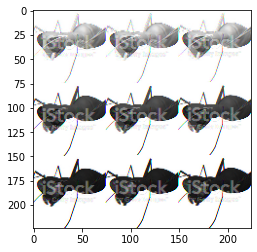

0


In [12]:
# Visualizing loaded (and transformed) data
print(data_loader)
print(len(data_loader))

for i, data in enumerate(data_loader, 0):
        inputs, labels = data
        print("Before Conversion: ")
        print("    ", type(inputs), type(labels))
        inputs = inputs.numpy()
        labels = labels.numpy()
        print("After Conversion: ")
        print("    ", type(inputs), type(labels))
        print(type(inputs), type(labels))
        print(inputs.shape, labels.shape)
        print("\n")

# Visualize 1st set of images
im = ""
label = ""
for i, data in enumerate(data_loader, 0):
        inputs, labels = data
        first_img = inputs.numpy()[0]
        first_label = labels.numpy()[0]
        c, h, w = first_img.shape
        first_img = np.reshape(first_img, (h, w, c))
        print(first_img.shape)
        im = first_img
        label = first_label
        break

plt.imshow(im)
plt.show()
print(label)
        

## Extra Blog Resources

1. https://towardsdatascience.com/building-efficient-custom-datasets-in-pytorch-2563b946fd9f
    
2. https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel
    
3. https://medium.com/speechmatics/how-to-build-a-streaming-dataloader-with-pytorch-a66dd891d9dd

# 2. Data Loaders - Available Datasets

    2.1. MNIST
    2.2. Fashion Mnist 
    2.3. EMNIST
    2.4. Coco Captions
    2.5. Coco Detections
    2.6. Cifar10
    2.7. Cifar100
    2.8. STL10
    2.9. SVNH

In [13]:
# Mnist
import os
root = os.getcwd() + "/Datasets/" 
mnist = datasets.MNIST(root, train=True, transform=None, target_transform=None, download=True)
mnist_loader = torch.utils.data.DataLoader(mnist, batch_size=4, shuffle=True, num_workers=2)

In [14]:
# Fashion Mnist
root = os.getcwd() + "/Datasets/" 
fashion_mnist = datasets.FashionMNIST(root, train=True, transform=None, target_transform=None, download=True)
fashion_mnist_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size=4, shuffle=True, num_workers=2)

In [15]:
# EMnist
root = os.getcwd() + "/Datasets/" 
# The second argument has six options: byclass, bymerge, balanced, letters, digits and mnist
emnist = datasets.EMNIST(root, "mnist", train=True, transform=None, target_transform=None, download=True)
emnist_loader = torch.utils.data.DataLoader(emnist, batch_size=4, shuffle=True, num_workers=2)

In [16]:
pip install pycocotools-windows

Note: you may need to restart the kernel to use updated packages.


In [17]:
'''
# COCO Captions
root = os.getcwd() + "/Datasets/"
# Annotation file
annFile = ""
coco_captions = datasets.CocoCaptions(root, annFile, transform=None, target_transform=None)
coco_captions_loader = torch.utils.data.DataLoader(coco_captions, batch_size=4, shuffle=True, num_workers=2)
'''

'\n# COCO Captions\nroot = os.getcwd() + "/Datasets/"\n# Annotation file\nannFile = ""\ncoco_captions = datasets.CocoCaptions(root, annFile, transform=None, target_transform=None)\ncoco_captions_loader = torch.utils.data.DataLoader(coco_captions, batch_size=4, shuffle=True, num_workers=2)\n'

In [18]:
# COCO Detection
'''
root = os.getcwd() + "/Datasets/" 
print(root)
# Annotation file
annFile = ""
coco_detections = datasets.CocoDetection(root, annFile, transform=None, target_transform=None)
coco_detections_loader = torch.utils.data.DataLoader(coco_detections, batch_size=4, shuffle=True, num_workers=2)
'''

'\nroot = os.getcwd() + "/Datasets/" \nprint(root)\n# Annotation file\nannFile = ""\ncoco_detections = datasets.CocoDetection(root, annFile, transform=None, target_transform=None)\ncoco_detections_loader = torch.utils.data.DataLoader(coco_detections, batch_size=4, shuffle=True, num_workers=2)\n'

In [19]:
# Cifar10
root = os.getcwd() + "/Datasets/" 
cifar10 = datasets.CIFAR10(root, train=True, transform=None, target_transform=None, download=True)
cifar10_loader = torch.utils.data.DataLoader(cifar10, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [20]:
# Cifar100
root = os.getcwd() + "/Datasets/" 
cifar100 = datasets.CIFAR100(root, train=True, transform=None, target_transform=None, download=True)
cifar100_loader = torch.utils.data.DataLoader(cifar100, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [21]:
# STL10
root = os.getcwd() + "/Datasets/" 
stl10 = datasets.STL10(root, split='train', transform=None, target_transform=None, download=True)
cifar100_loader = torch.utils.data.DataLoader(stl10, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [22]:
# SVHN
root = os.getcwd() + "/Datasets/" 
svnh = datasets.SVHN(root, split='train', transform=None, target_transform=None, download=True)
svnh_loader = torch.utils.data.DataLoader(svnh, batch_size=4, shuffle=True, num_workers=2)

Using downloaded and verified file: C:\Users\Divyansh Choubisa\Downloads\Image Processing and Computer Vision/Datasets/train_32x32.mat


# RoadMap  - Custom Data Loader Examples

    1. Multi Class Image Classifier - Foldered Dataset
    2. Multi Class Image Classifier - Load labels and path from CSV
    3. Multi Class Multi Label Image Classifier

## Extra Blog Resources

1. https://stats.stackexchange.com/questions/11859/what-is-the-difference-between-multiclass-and-multilabel-problem

In [23]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

import torch
import numpy as np
from torchvision import transforms, datasets
from PIL import Image
import cv2
%matplotlib inline
from matplotlib import pyplot as plt



import os
import pandas as pd
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


plt.ion()   # interactive mode

## 1. Multi Class Image Classifier - Foldered Dataset
    Data storage directory 
        [NOTE: Directory and File names can be anything]
        Parent Directory
            |
            |----Train
            |       |
            |       |----Class1
            |       |       |----img1.png
            |       |       |----img2.png
            |       |----Class2
            |       |       |----img1.png
            |               |----img2.png
            |-----Val
            |       |
            |       |----Class1
            |       |       |----img1.png
            |       |       |----img2.png
            |       |----Class2
            |       |       |----img1.png
            |       |       |----img2.png

In [24]:
#transformations
#setting ToTensor() commented for better visualization
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        #transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406],
        #                     std=[0.229, 0.224, 0.225])
    ])

#Using Image Folder Function
train_data = datasets.ImageFolder(root='Sample_Data/train/',
                                           transform=data_transform)

In [25]:
# Getting class list
class_list =  train_data.classes
print(class_list)

['ants', 'bees']


In [26]:
# Image class names to IDs
class_to_id = train_data.class_to_idx
print(class_to_id)

{'ants': 0, 'bees': 1}


In [27]:
# Getting images list with associated class ids
image_list = train_data.imgs
print(image_list)

[('Sample_Data/train/ants\\154124431_65460430f2.jpg', 0), ('Sample_Data/train/ants\\162603798_40b51f1654.jpg', 0), ('Sample_Data/train/ants\\175998972.jpg', 0), ('Sample_Data/train/bees\\16838648_415acd9e3f.jpg', 1), ('Sample_Data/train/bees\\174142798_e5ad6d76e0.jpg', 1), ('Sample_Data/train/bees\\472288710_2abee16fa0.jpg', 1)]


In [28]:
# Getting list of transforms applied
transforms_list = train_data.transform
print(transforms_list)

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
)


(224, 224) 0


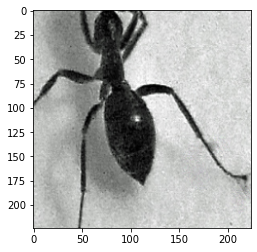

In [29]:
for image, label in train_data:
    print(image.size, label);
    plt.imshow(image)
    
    break;

In [30]:
#transformations
#uncommenting ToTensor()
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [31]:
#Using Image Folder Function
train_data = datasets.ImageFolder(root='Sample_Data/train',
                                           transform=data_transform)

In [32]:
#Using DataLoader
train_loader = torch.utils.data.DataLoader(train_data,
                                             batch_size=1, shuffle=True)

In [33]:
#batch size = 2
for data, labels in train_loader:
    print(data.shape, labels.shape);
    
    break;

torch.Size([1, 3, 224, 224]) torch.Size([1])


## 2. Multi Class Image Classifier - Load labels and path from CSV
     
    Data storage directory 
        [NOTE: Directory and File names can be anything]
        Parent Directory
            |
            |----Train
            |       |
            |       |----Images
            |       |       |----img1.png
            |       |       |----img2.png
            |       |----train_labels.csv
            |
            |----Val
            |       |
            |       |----Images
            |       |       |----img1.png
            |       |       |----img2.png
            |       |----val_labels.csv
            
            
    train_labels.csv contains a header row, the headers could be anything - one for image name column and another for the class id
    subsequent rows will be each filled with image names and labels
   

In [34]:
train_images_folder = "multi_class_dataset_csv/train";
train_csv = "multi_class_dataset_csv/train.csv";

In [35]:
# Create a custom Image Dataset Class

#img_list = list of images
#label_list = list of labels in the same order
#prefix = relative path to images folder

class DatasetMultiClassCSV(Dataset):
    def __init__(self, img_list, label_list, prefix, transform=None):
        self.img_list = img_list;
        self.label_list = label_list;
        self.transform = transform;
        self.prefix = prefix;
        self.classes = sorted(np.unique(label_list));
        self.class_to_idx = {};
        for i in range(len(self.classes)):
            self.class_to_idx[self.classes[i]] = i;
    
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, index):
        image_name = self.prefix + "/" + self.img_list[index];
        image = Image.open(image_name).convert('RGB');
        label = int(self.classes.index(self.label_list[index])); 
        if self.transform is not None:
            image = self.transform(image);
        return image, label

In [36]:
# Read the csv 

import pandas as pd
df = pd.read_csv(train_csv);

img_list = [];
label_list = [];

for i in range(len(df)):
    img_list.append(df["ID"][i]);
    label_list.append(df["LABEL"][i]);

In [37]:
#transformations

#setting ToTensor() commented for better visualization
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        #transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406],
        #                     std=[0.229, 0.224, 0.225])
    ])

#Using Image Folder Function
train_data = DatasetMultiClassCSV(img_list, label_list, train_images_folder,
                                           transform=data_transform)

In [38]:
# Getting class list
class_list =  train_data.classes
print(class_list)

['cat', 'dog']


In [39]:
# Image class names to IDs
class_to_id = train_data.class_to_idx
print(class_to_id)

{'cat': 0, 'dog': 1}


In [40]:
# Getting list of transforms applied
transforms_list = train_data.transform
print(transforms_list)

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
)


(224, 224) 1


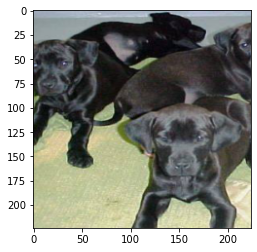

In [41]:
for image, label in train_data:
    print(image.size, label);
    plt.imshow(image)
    
    break;

In [42]:
#transformations
#uncommenting ToTensor()
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [43]:
#Using Image Folder Function
train_data = DatasetMultiClassCSV(img_list, label_list, train_images_folder,
                                           transform=data_transform)

In [44]:
#Using DataLoader
train_loader = torch.utils.data.DataLoader(train_data,
                                             batch_size=1, shuffle=True)

In [45]:
#batch size = 2
for data, labels in train_loader:
    print(data.shape, labels.shape);
    
    break;

torch.Size([1, 3, 224, 224]) torch.Size([1])


## 3. Multi Class Multi Label Image Classifier  - One hot encoding

    Data storage directory 
        [NOTE: Directory and File names can be anything]
        Parent Directory
            |
            |----Train
            |       |
            |       |----Images
            |       |       |----img1.png
            |       |       |----img2.png
            |       |----train_labels.csv
            |
            |----Val
            |       |
            |       |----Images
            |       |       |----img1.png
            |       |       |----img2.png
            |       |----val_labels.csv
            
            
    train_labels.csv contains a header row, the headers could be anything - one for image name column and another for the list of classes it represents
    subsequent rows will be each filled with image names and list of labels
    
    # A sample of data is taken from https://analyticsindiamag.com/multi-label-image-classification-with-tensorflow-keras/ for demonstration


In [46]:
train_images_folder = "multi_label_dataset/Images";
train_csv = "multi_label_dataset/train_labels.csv";

In [47]:
# Create a custom Image Dataset Class

#img_list = list of images
#label_list = list of labels in the same order
#prefix = relative path to images folder

class DatasetMultiClassMultiLabelCSV(Dataset):
    def __init__(self, img_list, label_list, prefix, transform=None):
        self.img_list = img_list;
        self.label_list = label_list;
        self.transform = transform;
        self.prefix = prefix;
        self.classes = self.get_classes();
        self.class_to_idx = {};
        for i in range(len(self.classes)):
            self.class_to_idx[self.classes[i]] = i; 
    
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, index):
        image_name = self.prefix + "/" + self.img_list[index];
        image = Image.open(image_name).convert('RGB');
        label = self.get_one_hot_label(self.label_list[index]); 
        if self.transform is not None:
            image = self.transform(image);
        return image, label
    
    def get_classes(self):
        classes = [];
        for i in range(len(self.label_list)):
            tmp = self.label_list[i].split(",");
            for j in range(len(tmp)):
                if tmp[j] not in classes:
                    classes.append(tmp[j]);
        return sorted(classes)
    
    def get_one_hot_label(self, label_list):
        label = [];
        for i in range(len(self.classes)):
            if(self.classes[i] in label_list):
                label.append(1);
            else:
                label.append(0);
        return label
            
        

In [48]:
# Read the csv 

import pandas as pd
df = pd.read_csv(train_csv);

img_list = [];
label_list = [];

for i in range(len(df)):
    img_list.append(df["ID"][i]);
    label_list.append(df["LABEL"][i]);

In [49]:
label_list[0]

'desert'

In [50]:
#transformations

#setting ToTensor() commented for better visualization
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        #transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406],
        #                     std=[0.229, 0.224, 0.225])
    ])

#Using Image Folder Function
train_data = DatasetMultiClassMultiLabelCSV(img_list, label_list, train_images_folder,
                                           transform=data_transform)

In [51]:
# Getting class list
class_list =  train_data.classes
print(class_list)

['desert', 'mountains', 'sunset', 'trees']


In [52]:
# Image class names to IDs
class_to_id = train_data.class_to_idx
print(class_to_id)

{'desert': 0, 'mountains': 1, 'sunset': 2, 'trees': 3}


In [53]:
# Getting list of transforms applied
transforms_list = train_data.transform
print(transforms_list)

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
)


(224, 224) [1, 0, 0, 0]


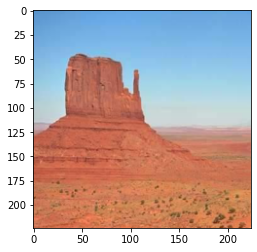

In [54]:
for image, label in train_data:
    print(image.size, label);
    plt.imshow(image)
    
    break;

In [55]:
#transformations
#uncommenting ToTensor()
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [56]:
#Using Image Folder Function
train_data = DatasetMultiClassCSV(img_list, label_list, train_images_folder,
                                           transform=data_transform)

In [57]:
#Using DataLoader
train_loader = torch.utils.data.DataLoader(train_data,
                                             batch_size=1, shuffle=True,
                                             #num_workers=4
                                          )

In [58]:
#batch size = 2
for data, labels in train_loader:
    print(data.shape, labels.shape);
    
    break;

torch.Size([1, 3, 224, 224]) torch.Size([1])


## Appendix Modules - Data Loading using Monk 

 - Load Data using single line of code
 - Apply Transforms with few lines of code

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1

In [ ]:
!pip install -r monk_v1/installation/requirements_cu9.txt    
#Select Installation file as per the system

In [ ]:
import sys
sys.path.append("monk_v1/monk/")
from pytorch_prototype import prototype

# Step 1 - Create experiment
ptf = prototype(verbose=1);
ptf.Prototype("exp-1", "proj-1");

### 1. Multi Class Image Classifier - Foldered Dataset

In [ ]:
# Few Lines of Code
ptf.Dataset_Params(dataset_path="Sample_Datatrain", 
                   split=0.9,input_size=224, batch_size=16, 
                   shuffle_data=True, num_processors=3);

# Transform
ptf.apply_random_horizontal_flip(train=True, val=True);
ptf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True);

# Set Dataset
ptf.Dataset();

### 2. Multi Class Image Classifier - Load labels and path from CSV

In [ ]:
# Few Lines of Code
ptf.Dataset_Params(dataset_path="multi_class_dataset_csv/train", 
                   path_to_csv="multi_class_dataset_csv/train.csv",
                   split=0.9,input_size=224, batch_size=16, 
                   shuffle_data=True, num_processors=3);

# Transform
ptf.apply_random_horizontal_flip(train=True, val=True);
ptf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True);

# Set Dataset
ptf.Dataset();